In [1]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

C:\Users\erica\miniconda3\envs\ecganalysis\python.exe
3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 05:37:49) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=7, micro=12, releaselevel='final', serial=0)


In [1]:
from IPython.display import display
import wfdb
import skfda

#import matplotlib.pyplot as plt
#%matplotlib inline
#import numpy as np
#import os
#import shutil
#import posixpath



## Import signals

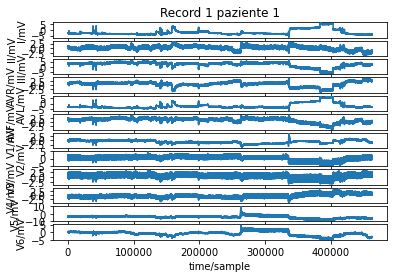

{'record_name': 'I24',
 'n_sig': 12,
 'fs': 257,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 462600,
 'base_time': None,
 'base_date': None,
 'comments': ['<age>: 52 <sex>: M <diagnoses> Earlier MI',
  'patient 11',
  'PVCs,   ST depression'],
 'sig_name': ['I',
  'II',
  'III',
  'AVR',
  'AVL',
  'AVF',
  'V1',
  'V2',
  'V3',
  'V4',
  'V5',
  'V6'],
 'p_signal': array([[-2.46974063,  1.27665706,  3.64457253, ..., -0.2142171 ,
         -3.49567723,  0.21229587],
        [-2.42267051,  1.2795389 ,  3.60038425, ..., -0.15754083,
         -3.44284342,  0.24495677],
        [-2.41594621,  1.09798271,  3.41210375, ..., -0.38520653,
         -3.5456292 ,  0.24303554],
        ...,
        [-3.94524496, -1.42939481,  2.41402498, ...,  0.99135447,
         -6.0778098 , -3.17771374],
        [-4.02977906, -1.47934678,  2.44860711, ...,  0.99423631,
         -6.07973103, -3.2074928 ],
        [-4.01248799, -1.46589817,  2.44476465, ...,  0.98847262,
         -6.07492795, -3.2103

In [3]:
record = wfdb.rdrecord('I24') 
wfdb.plot_wfdb(record=record, title='Record 1 paziente 1') 
display(record.__dict__)

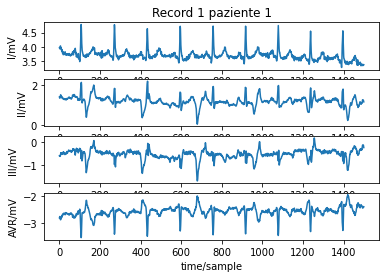

{'record_name': 'I24',
 'n_sig': 12,
 'fs': 257,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 462600,
 'base_time': None,
 'base_date': None,
 'comments': ['<age>: 52 <sex>: M <diagnoses> Earlier MI',
  'patient 11',
  'PVCs,   ST depression'],
 'sig_name': ['I',
  'II',
  'III',
  'AVR',
  'AVL',
  'AVF',
  'V1',
  'V2',
  'V3',
  'V4',
  'V5',
  'V6'],
 'p_signal': array([[-2.46974063,  1.27665706,  3.64457253, ..., -0.2142171 ,
         -3.49567723,  0.21229587],
        [-2.42267051,  1.2795389 ,  3.60038425, ..., -0.15754083,
         -3.44284342,  0.24495677],
        [-2.41594621,  1.09798271,  3.41210375, ..., -0.38520653,
         -3.5456292 ,  0.24303554],
        ...,
        [-3.94524496, -1.42939481,  2.41402498, ...,  0.99135447,
         -6.0778098 , -3.17771374],
        [-4.02977906, -1.47934678,  2.44860711, ...,  0.99423631,
         -6.07973103, -3.2074928 ],
        [-4.01248799, -1.46589817,  2.44476465, ...,  0.98847262,
         -6.07492795, -3.2103

In [4]:
# deciding which channel get and the sample interval
record_1 = wfdb.rdrecord('I01', channels = [0,1,2,3], sampfrom = 1000, sampto = 2500) 
wfdb.plot_wfdb(record=record_1, title='Record 1 paziente 1') 
display(record.__dict__)

## Obtaining the arrays of the signals and the dictionary of the patient info

In [3]:
# here you get the full sample
signals, fields = wfdb.rdsamp('I01')

# or you can select which channel get the sample form and the sample interval
# signals, fields = wfdb.rdsamp('I01', sampfrom=500, sampto=1000, channels=[1,2,3])

In [13]:
signals.shape

(462600, 12)

In [14]:
type(fields)

dict

In [29]:
fields

{'fs': 257,
 'sig_len': 462600,
 'n_sig': 12,
 'base_date': None,
 'base_time': None,
 'units': ['mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV'],
 'sig_name': ['I',
  'II',
  'III',
  'AVR',
  'AVL',
  'AVF',
  'V1',
  'V2',
  'V3',
  'V4',
  'V5',
  'V6'],
 'comments': ['<age>: 59 <sex>: M <diagnoses> Acute MI',
  'patient 2',
  'bradycardia, tachycardia, PVCs, ventricular couplets, paroxysmal VT']}

## Plotting the singals and starting the FDA

In [2]:
# funzione che non mi crea subplots ma solo un plot per channel
def PlotSignals(signals, start, end, channel):
    sample = range(start,end)
    plt.figure(figsize=(12, 8))
    plt.title("Signal %d"%channel)
    plt.xlabel("Sample number")
    plt.ylabel("%d channel"%channel)
    plt.plot(range(start,end), signals[start:end,channel] , color = "black")
    plt.show()

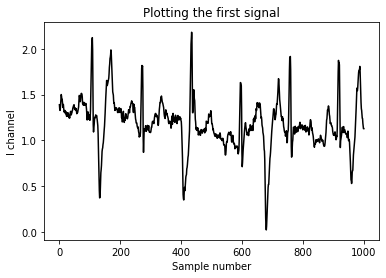

In [4]:
plt.title("Plotting the first signal")
plt.xlabel("Sample number")
plt.ylabel("I channel")
plt.plot(range(1000), signals[1000:2000,1] , color = "black")
plt.show()

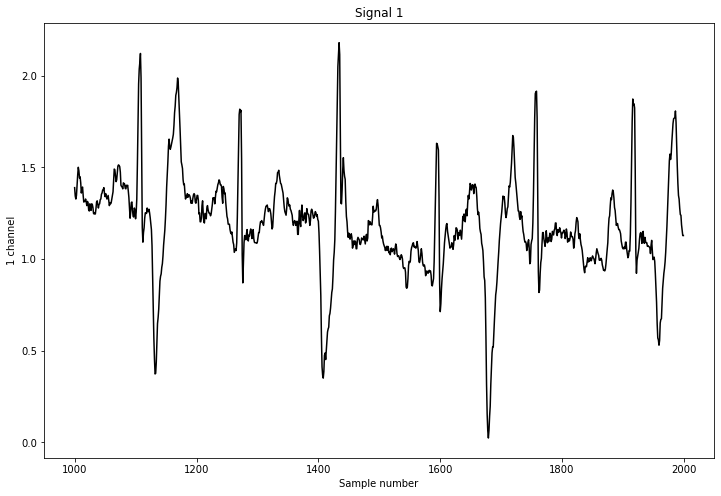

In [4]:
# other sognal from saeme patient
signals2, fields2 = wfdb.rdsamp('I01')

PlotSignals(signals2,1000,2000,1)

## Provando ad iniziare un po' di FDA (I'm scared)

In [7]:
import skfda

ImportError: Numba needs NumPy 1.20 or less

In [ ]:
basis = skfda.representation.basis.Fourier(n_basis=5)
basis.plot()
plt.show()

In [8]:
np.__version__

'1.21.3'